<a href="https://colab.research.google.com/github/Ramcharan1214/H20AutoML/blob/main/customerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction for Subscription Services

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
openjdk version "11.0.23" 2024-04-16
OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)


In [ ]:
!pip install h2o

In [ ]:
import h2o

In [ ]:
h2o.init()
from h2o.automl import H2OAutoML

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 4 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_th5q4e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.944 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Read the dataset

In [ ]:
data=h2o.import_file("/content/E Commerce Dataset 1.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Dataset Exploration/Visualization

In [ ]:
data.head()

﻿CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
50002,1,nan,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,121
50003,1,nan,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120
50004,1,0,Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
50005,1,0,Phone,1,12,CC,Male,nan,3,Mobile,5,Single,3,0,11,1,1,3,130
50006,1,0,Computer,1,22,Debit Card,Female,3,5,Mobile Phone,5,Single,2,1,22,4,6,7,139
50007,1,nan,Phone,3,11,Cash on Delivery,Male,2,3,Laptop & Accessory,2,Divorced,4,0,14,0,1,0,121
50008,1,nan,Phone,1,6,CC,Male,3,3,Mobile,2,Divorced,3,1,16,2,2,0,123
50009,1,13,Phone,3,9,E wallet,Male,nan,4,Mobile,3,Divorced,2,1,14,0,1,2,127
50010,1,nan,Phone,1,31,Debit Card,Male,2,5,Mobile,3,Single,2,0,12,1,1,1,123


In [ ]:
data.summary()

<ipython-input-270-aceed04099f2>:1: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  data.summary()


,﻿CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
type,int,int,int,enum,int,int,enum,enum,int,int,enum,int,enum,int,int,int,int,int,int,int
mins,50001.0,0.0,0.0,,1.0,5.0,,,0.0,1.0,,1.0,,1.0,0.0,11.0,0.0,1.0,0.0,0.0
mean,52815.5,0.16838365896980462,10.189899366380919,,1.6547069271758437,15.639895891429628,,,2.9315348837209294,3.68898756660746,,3.066785079928952,,4.214031971580816,0.2849023090586146,15.70792171481827,1.7510234462225538,3.0080044676098288,4.543490512868681,177.22149200710479
maxs,55630.0,1.0,61.0,,3.0,127.0,,,5.0,6.0,,5.0,,22.0,1.0,26.0,16.0,16.0,46.0,325.0
sigma,1625.3853389273572,0.3742398682676651,8.557240984165,,0.9153892691210666,8.531475186762629,,,0.7219258499760609,1.0239985188585792,,1.3801944509094801,,2.5835855126063785,0.4514079937386503,3.6754854627464644,1.8946214472186498,2.9396795481512608,3.6544331967013357,49.193868908886955
zeros,0,4682,508,,0,0,,,3,0,,0,,0,4026,0,1030,0,496,4
missing,0,0,264,0,0,251,0,0,255,0,0,0,0,0,0,265,256,258,307,0
0,50001.0,1.0,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,50002.0,1.0,nan,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,50003.0,1.0,nan,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0


In [ ]:
data.isna().sum()

1856.0

In [ ]:
data.columns

['\ufeffCustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
data=data.drop('\ufeffCustomerID')

In [ ]:
data.head()

Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,nan,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,121
1,nan,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120
1,0,Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
1,0,Phone,1,12,CC,Male,nan,3,Mobile,5,Single,3,0,11,1,1,3,130
1,0,Computer,1,22,Debit Card,Female,3,5,Mobile Phone,5,Single,2,1,22,4,6,7,139
1,nan,Phone,3,11,Cash on Delivery,Male,2,3,Laptop & Accessory,2,Divorced,4,0,14,0,1,0,121
1,nan,Phone,1,6,CC,Male,3,3,Mobile,2,Divorced,3,1,16,2,2,0,123
1,13,Phone,3,9,E wallet,Male,nan,4,Mobile,3,Divorced,2,1,14,0,1,2,127
1,nan,Phone,1,31,Debit Card,Male,2,5,Mobile,3,Single,2,0,12,1,1,1,123


In [ ]:
null_counts = data.isna()

# Encoding the Data

filter the columns which has categorical columns

In [ ]:
column_types = data.types
categorical_columns = [col for col, col_type in column_types.items() if col_type == 'enum']

In [ ]:
categorical_columns

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

Using Label Encoding helps to replace string values by numerical values in the dataset with based on the category as 0,1,2

In [ ]:
for col in categorical_columns:
    data[col] = data[col].asfactor()
    data[col]=data[col].asnumeric()

In [ ]:
data.head()

Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,4,1,3,6,4,0,3,3,2,2,2,9,1,11,1,1,5,160
1,nan,2,1,8,6,1,3,4,3,3,2,7,1,15,0,1,0,121
1,nan,2,1,30,4,1,2,4,3,3,2,6,1,14,0,1,3,120
1,0,2,3,15,4,1,2,4,2,5,2,8,0,23,0,1,3,134
1,0,2,1,12,0,1,nan,3,3,5,2,3,0,11,1,1,3,130
1,0,0,1,22,4,0,3,5,4,5,2,2,1,22,4,6,7,139
1,nan,2,3,11,2,1,2,3,2,2,0,4,0,14,0,1,0,121
1,nan,2,1,6,0,1,3,3,3,2,0,3,1,16,2,2,0,123
1,13,2,3,9,5,1,nan,4,3,3,0,2,1,14,0,1,2,127
1,nan,2,1,31,4,1,2,5,3,3,2,2,0,12,1,1,1,123


# **Handling the missing values**

In [ ]:
data.impute(method="mean")

[0.16838365896980462,
 10.189899366380919,
 0.9284191829484912,
 1.6547069271758437,
 15.639895891429628,
 3.5481349911190048,
 0.6010657193605684,
 2.9315348837209294,
 3.68898756660746,
 2.369626998223801,
 3.066785079928952,
 1.168383658969805,
 4.214031971580816,
 0.2849023090586146,
 15.70792171481827,
 1.7510234462225538,
 3.0080044676098288,
 4.543490512868681,
 177.22149200710479]

In [ ]:
data.head()

Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,4,1,3,6,4,0,3,3,2,2,2,9,1,11,1,1,5,160
1,10.1899,2,1,8,6,1,3,4,3,3,2,7,1,15,0,1,0,121
1,10.1899,2,1,30,4,1,2,4,3,3,2,6,1,14,0,1,3,120
1,0,2,3,15,4,1,2,4,2,5,2,8,0,23,0,1,3,134
1,0,2,1,12,0,1,2.93153,3,3,5,2,3,0,11,1,1,3,130
1,0,0,1,22,4,0,3,5,4,5,2,2,1,22,4,6,7,139
1,10.1899,2,3,11,2,1,2,3,2,2,0,4,0,14,0,1,0,121
1,10.1899,2,1,6,0,1,3,3,3,2,0,3,1,16,2,2,0,123
1,13,2,3,9,5,1,2.93153,4,3,3,0,2,1,14,0,1,2,127
1,10.1899,2,1,31,4,1,2,5,3,3,2,2,0,12,1,1,1,123


Finding correlation between all the columns in the dataset to know how they are correlated to other.

In [ ]:
h2o_cor=data.cor()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


<Axes: title={'center': 'Correlation Heatmap'}>

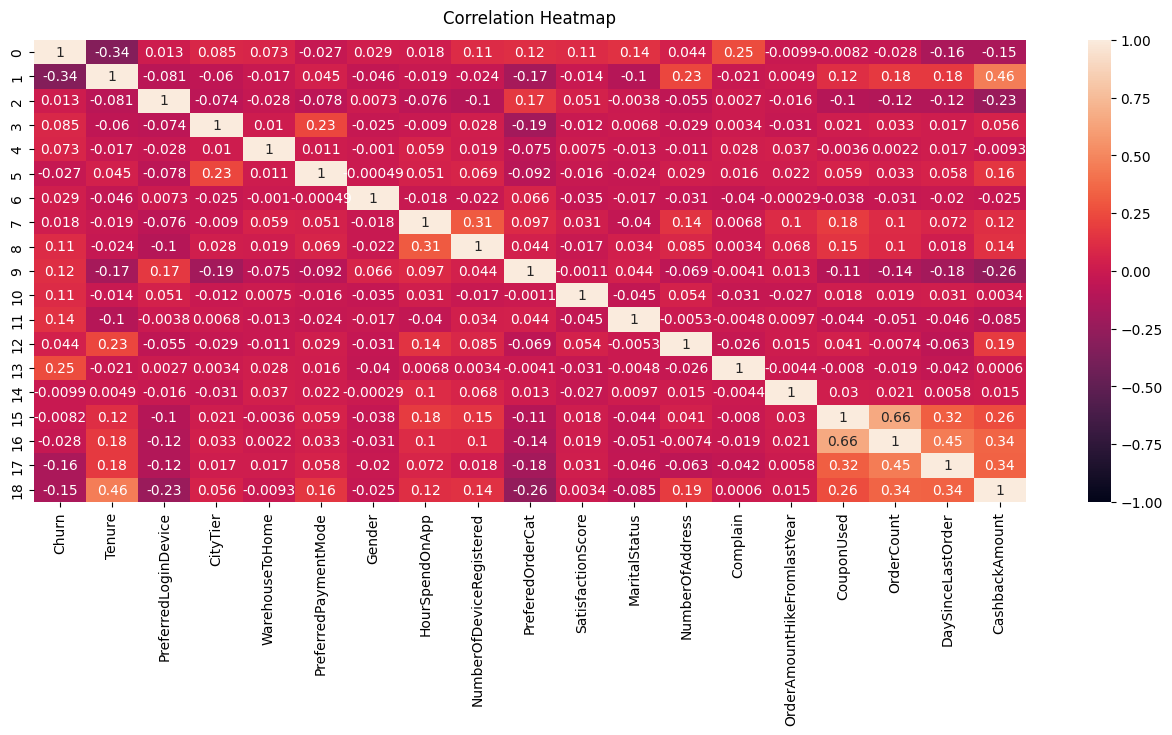

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(h2o_cor.as_data_frame(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
heatmap

By the correlation matrix we can find that the columns Complain,SatisfactionScore,MartialStatus,PreferedOrderedCat,NumberOfDeviceRegistered plays keyrole or highly correlated to customer churn.

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


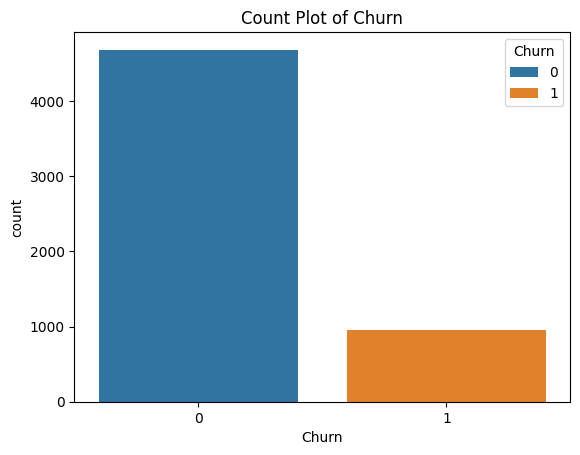

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


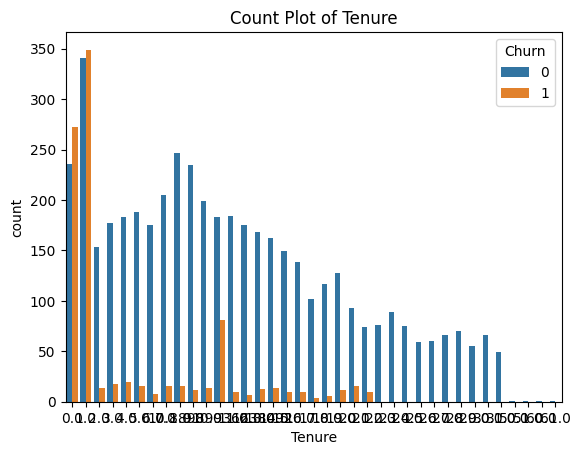

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


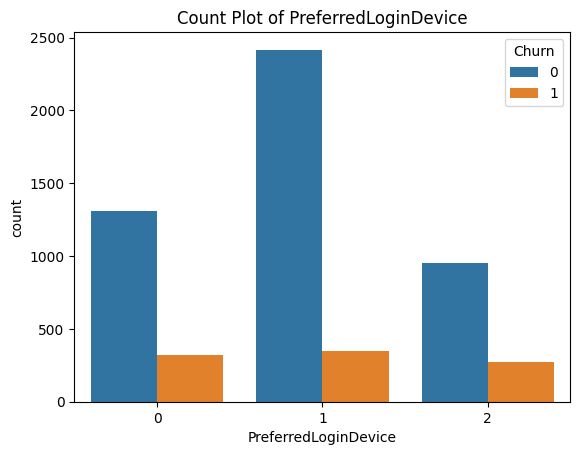

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


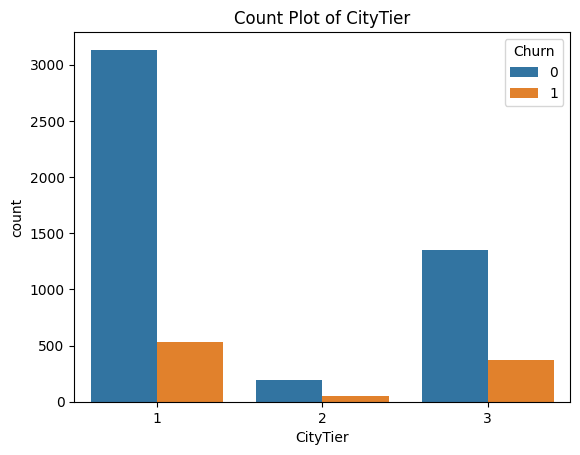

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


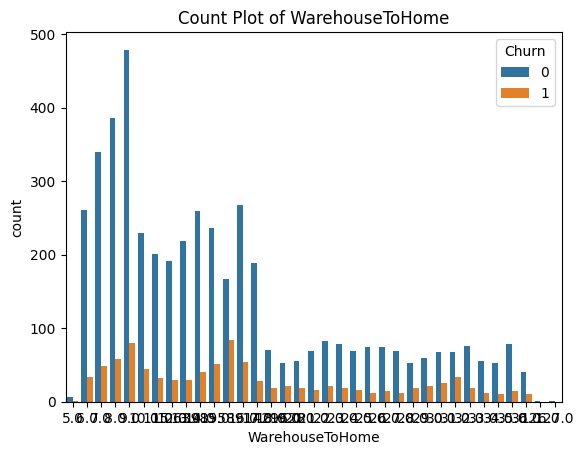

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


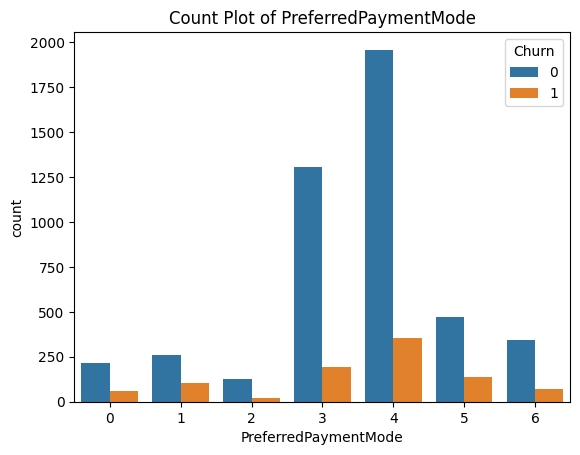

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


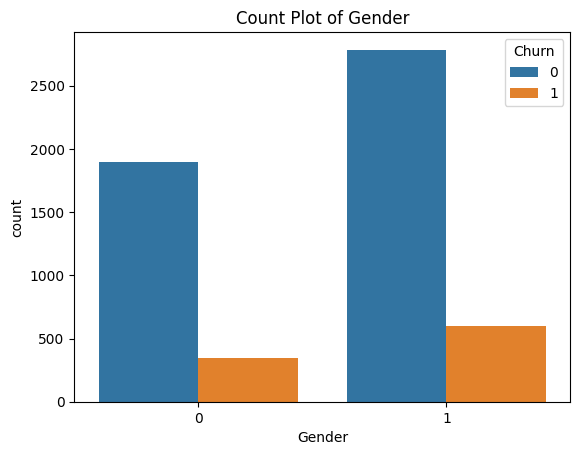

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


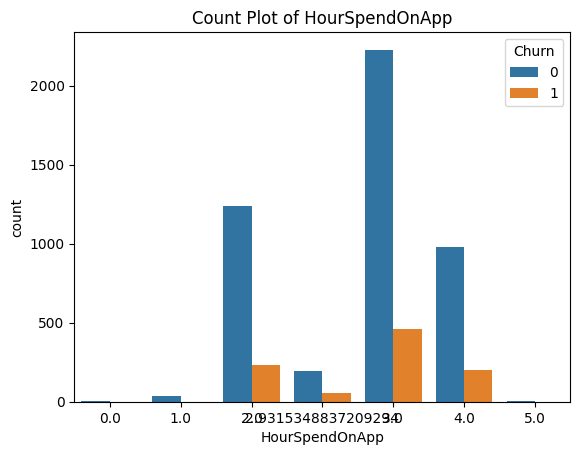

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


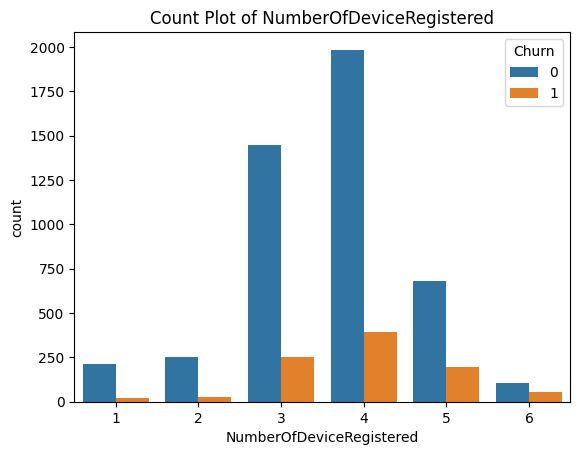

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


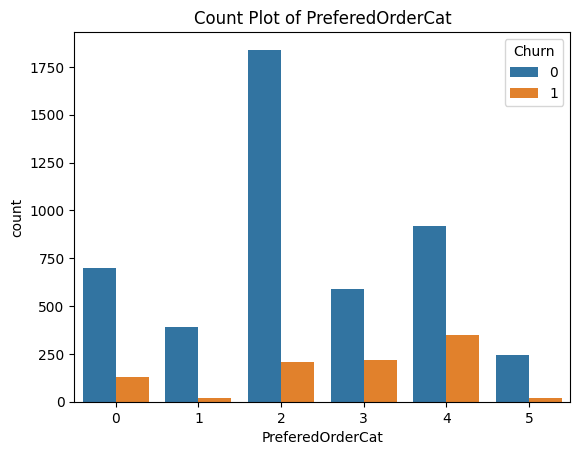

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


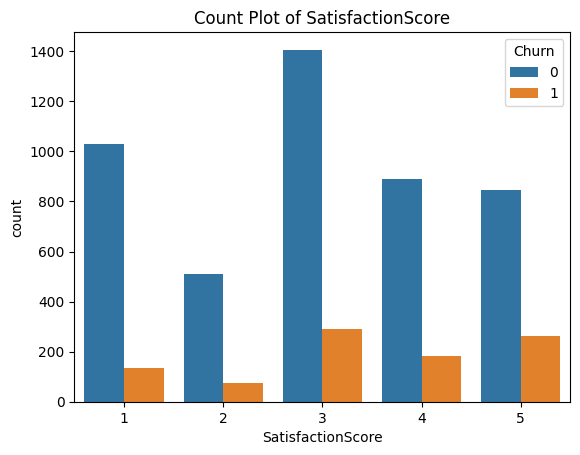

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


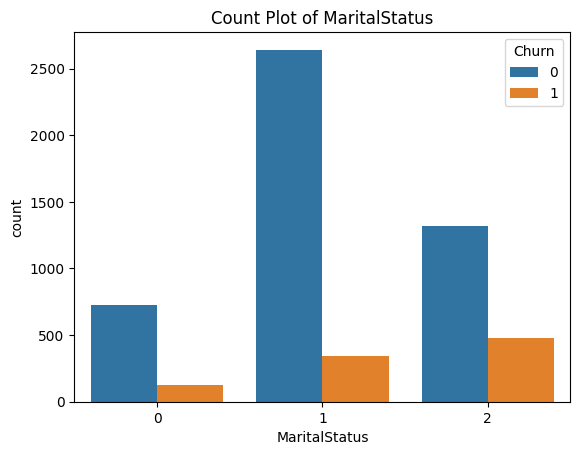

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


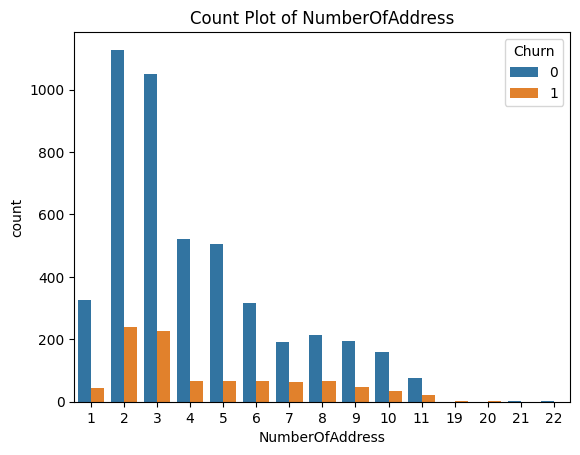

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


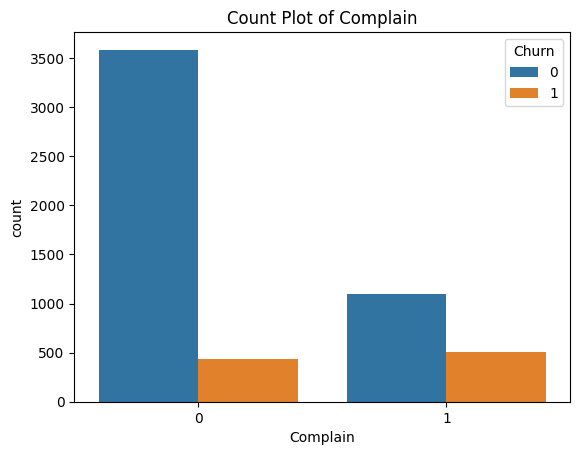

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


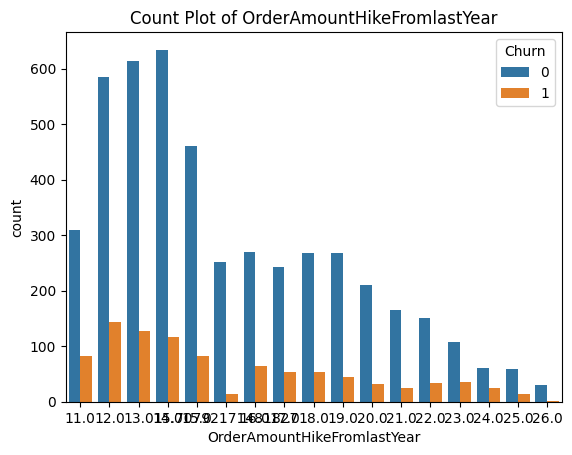

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


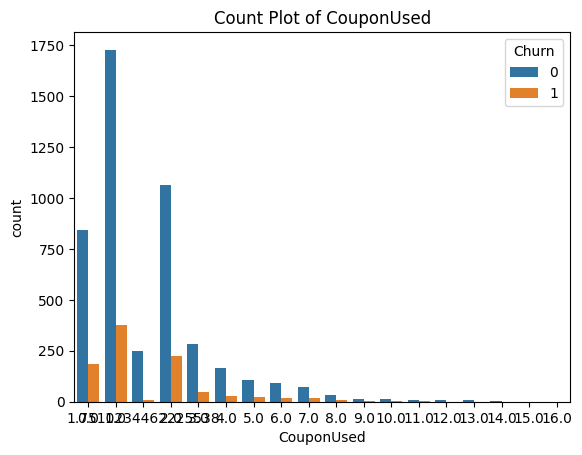

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


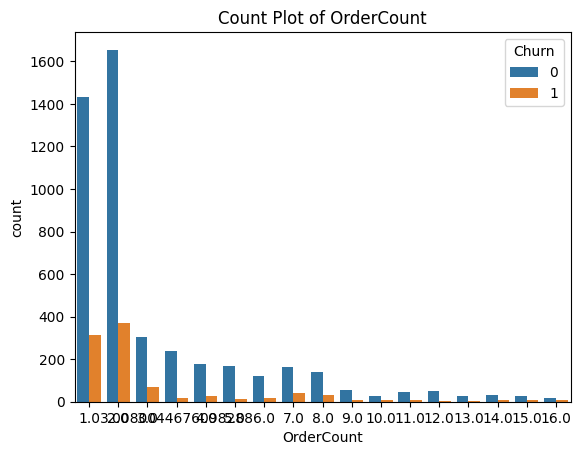

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


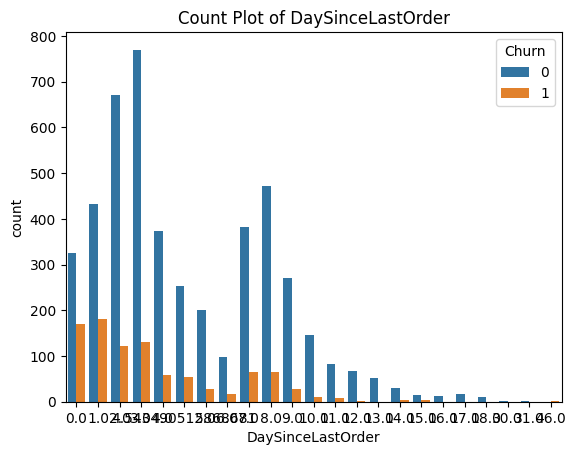

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


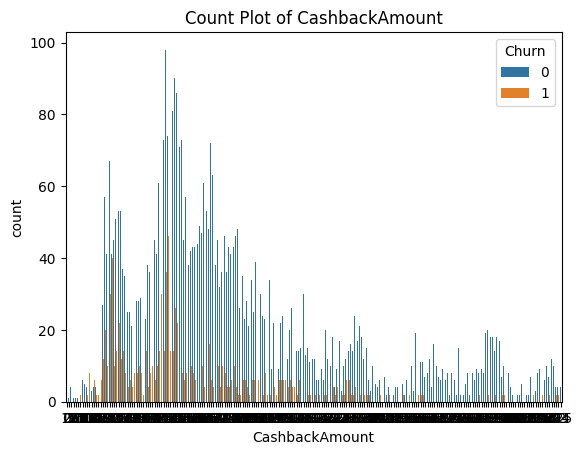

In [ ]:
# prompt: create count plots for the all columns and churn column in h2o dataframe

import matplotlib.pyplot as plt
for col in data.columns:
  plt.figure()
  plt.title(f"Count Plot of {col}")
  sns.countplot(x=col, hue="Churn", data=data.as_data_frame())
  plt.show()




Explanation of each map:

**CityTier and churn count plot**- when cityTier is 3 percenntage of getting churn is more (33% aprox)

**Tenure Count plot**- customers who have tenure as o and 1 has more probablity of getting churn from subscription.

**PreferredloginDevices**- when preferredlogindevices is 0,2 it slightly more probablity og customer getting churn  from subscription.

**NumberofDevices Registered**- when 5 or more no of devices registered it has more chance of getting churn from subscription.

**PreferredorderCat count plot**-  When Preferred order category of customer in last month is Mobile and Mobile phone it have more probability of getting custmor churn from subscription.

**MartialStatus Count Plot**- when martialstatus of customer is single has more percentage of gettting churn from subscription.

 **Complain Count Plot**- customers who raised a complain has more percentage of gettin churn from subscription.


# Spliting the Dataset

In [ ]:
X=data.columns
X.remove('Churn')
y='Churn'

In [ ]:
data[y] = data[y].asfactor()

In [ ]:
train,test,valid = data.split_frame(ratios=[.7, .15])

In [ ]:
X,y

(['Tenure',
  'PreferredLoginDevice',
  'CityTier',
  'WarehouseToHome',
  'PreferredPaymentMode',
  'Gender',
  'HourSpendOnApp',
  'NumberOfDeviceRegistered',
  'PreferedOrderCat',
  'SatisfactionScore',
  'MaritalStatus',
  'NumberOfAddress',
  'Complain',
  'OrderAmountHikeFromlastYear',
  'CouponUsed',
  'OrderCount',
  'DaySinceLastOrder',
  'CashbackAmount'],
 'Churn')

# Define the model

First Lets try to use H20AutoML model with 10 models

H2O AutoML automates the process of training and tuning machine learning models. Users provide a dataset and specify time or resource constraints, and H2O AutoML handles preprocessing, model training, hyperparameter tuning, and evaluation. It runs multiple algorithms and selects the best models, making it easy for both beginners and experts to build robust machine learning models quickly.

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10,verbosity="info", nfolds=5)

In [ ]:
aml.train(x = X, y = 'Churn', training_frame = train, validation_frame=valid)

AutoML progress: |
09:05:48.121: Project: AutoML_7_20240702_90548
09:05:48.121: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
09:05:48.122: Setting stopping tolerance adaptively based on the training frame: 0.015961737689352443
09:05:48.122: Build control seed: 10
09:05:48.122: training frame: Frame key: AutoML_7_20240702_90548_training_py_171_sid_b993    cols: 19    rows: 3925  chunks: 8    size: 108053  checksum: 4571221541967398521
09:05:48.122: validation frame: Frame key: py_173_sid_b993    cols: 19    rows: 838  chunks: 8    size: 38031  checksum: 2337259192965301454
09:05:48.122: leaderboard frame: NULL
09:05:48.122: blending frame: NULL
09:05:48.122: response column: Churn
09:05:48.122: fold column: null
09:05:48.122: weights column: null
09:05:48.122: Loading execution

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),0/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_7_20240702_90548,0.982199,0.114588,0.937944,0.0687321,0.177191,0.0313966
GBM_4_AutoML_7_20240702_90548,0.981258,0.122508,0.934993,0.0760867,0.181471,0.0329316
GBM_3_AutoML_7_20240702_90548,0.981072,0.121347,0.935392,0.0590738,0.183173,0.0335524
GBM_2_AutoML_7_20240702_90548,0.98093,0.122248,0.934149,0.0716404,0.183539,0.0336866
StackedEnsemble_BestOfFamily_1_AutoML_7_20240702_90548,0.980728,0.117314,0.934724,0.0779253,0.178737,0.031947
DRF_1_AutoML_7_20240702_90548,0.975912,0.172791,0.921875,0.0855807,0.209673,0.0439629
XGBoost_3_AutoML_7_20240702_90548,0.965067,0.163824,0.882711,0.113598,0.215465,0.046425
XRT_1_AutoML_7_20240702_90548,0.964275,0.197503,0.881666,0.114817,0.232953,0.0542671
GBM_1_AutoML_7_20240702_90548,0.964,0.173726,0.864551,0.125691,0.224966,0.0506098
XGBoost_2_AutoML_7_20240702_90548,0.957239,0.184107,0.849872,0.111887,0.230954,0.0533397


In [ ]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),0/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# Predicting new values using test datset

In [ ]:
churn_pred=aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
churn_pred.head()

predict,p0,p1
1,0.0653719,0.934628
0,0.876168,0.123832
1,0.0811626,0.918837
0,0.974304,0.0256961
0,0.9851,0.0148998
0,0.97074,0.0292601
0,0.759556,0.240444
0,0.995557,0.00444268
0,0.996238,0.00376208
0,0.994099,0.00590118


In [ ]:
pred_df = churn_pred.as_data_frame()
valid_df = test.as_data_frame()

# Combine actual and predicted values into one dataframe
comparison_df = valid_df[['Churn']].copy()
comparison_df["predicted"] = pred_df["predict"]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
comparison_df.head()

,Churn,predicted
0,1,1
1,1,0
2,1,1
3,0,0
4,0,0


# Hypertune the Top model in the above H20 AUTOML model to get better perfromance model.

In [ ]:
model_ids = lb['model_id'].as_data_frame().iloc[:,0].tolist()
GBM_model = h2o.get_model(model_ids[1])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


**Intialize Parameters**

In [ ]:
hyper_params = {
    'ntrees': [25,50,90,100,120],
    'max_depth': [5,7,8,10,12,15],
    'learn_rate': [0.01, 0.02,0.1,0.2],
}

# Define the search criteria for random search
search_criteria = {
    'strategy': 'RandomDiscrete',
    'max_models': 10,
    'seed': 1534,

}

In [ ]:

from h2o.grid.grid_search import H2OGridSearch

In [ ]:
gbm_grid = H2OGridSearch(
    model=GBM_model,
    hyper_params=hyper_params,
    search_criteria=search_criteria
)

In [ ]:
gbm_grid.train(
    x=X,
    y=y,
    training_frame=train,
    categorical_encoding ='LabelEncoder',
    validation_frame=valid,
    stopping_tolerance=0.01,
    stopping_rounds=5,
    score_tree_interval=10
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,learn_rate,max_depth,ntrees,model_ids,logloss
,0.1,15.0,50.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_1,0.1119212
,0.1,10.0,90.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_3,0.1123423
,0.2,7.0,120.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_9,0.1250102
,0.2,8.0,90.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_7,0.1264436
,0.2,12.0,90.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_6,0.1494711
,0.1,5.0,50.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_5,0.1861995
,0.01,12.0,120.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_4,0.2194278
,0.02,12.0,25.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_2,0.3023560
,0.01,15.0,50.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_10,0.3026881
,0.01,5.0,50.0,Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_8,0.3355157


**Grid Search Results**

In [ ]:
sorted_grid = gbm_grid.get_grid(sort_by='auc', decreasing=True)

In [ ]:

top_model = sorted_grid.models[0]


**Performance of the Top GBM model**

In [ ]:
top_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: Grid_GBM_py_171_sid_b993_model_python_1719907238554_16772_model_6


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    90                 90                          203647                 12           12           12            115           245           175.422

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.050104987019487e-08
RMSE: 0.00014318187689157756
LogLoss: 5.596350567350338e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9984475307056953
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      3272  0    0        (0.0/3272.0)
1      0     653  0        (0.0/653.0)
Total  3272  653  0        (0.0/3925.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.998448     1         194
max f2                       0.998448     1         194
max f0point5                 0.998448     1         194
max accuracy                 0.998448     1         194
max precision                0.999995     1         0
max recall                   0.998448     1         194
max specificity              0.999995     1         0
max absolute_mcc             0.998448     1         194
max min_per_class_accuracy   0.998448     1         194
max mean_per_class_accuracy  0.998448     1         194
max tns                      0.999995     3272      0
max fns                      0.999995     647       0
max fps                      2.07233e-07  3272      399
max tps                      0.998448     653       194
max tnr                      0.999995     1         0
max fnr                      0.999995     0.990812  0
max fpr                      2.07233e-07  1         399
max tpr                      0.998448     1         194

Gains/Lift Table: Avg response rate: 16.64 %, avg score: 16.64 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0101911                   0.999983           6.01072  6.01072            1                0.99999      1                           0.99999             0.0612557       0.0612557                  501.072  501.072            0.0612557
2        0.0201274                   0.999971           6.01072  6.01072            1                0.999977     1                           0.999983            0.0597243       0.12098                    501.072  501.072            0.12098
3        0.0300637                   0.999959           6.01072  6.01072            1                0.999964     1                           0.999977            0.0597243       0.180704                   501.072  501.072            0.180704
4        0.0402548                   0.999949           6.01072  6.01072            1                0.999954     1                           0.999971            0.0612557       0.24196                    501.072  501.072            0.24196
5        0.0501911                   0.999937           6.01072  6.01072            1                0.999944     1                           0.999966            0.0597243       0.3

**Top GBM model on test dataset**

In [ ]:
gbm_pred = top_model.predict(valid)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


**Performance of GBM model after predicting new values**

In [ ]:
perf = top_model.model_performance(valid)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.02822613240696255
RMSE: 0.16800634632942457
LogLoss: 0.14947111572791072
Mean Per-Class Error: 0.04146541137945149
AUC: 0.9908514121981171
AUCPR: 0.9664181242848198
Gini: 0.9817028243962342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.009015906206960194
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      680  18   0.0258   (18.0/698.0)
1      8    132  0.0571   (8.0/140.0)
Total  688  150  0.031    (26.0/838.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.00901591   0.910345  140
max f2                       0.00901591   0.929577  140
max f0point5                 0.526048     0.9375    116
max accuracy                 0.526048     0.970167  116
max precision                0.999992     1         0
max recall                   

**compare original values and predicted values**

In [ ]:
GBM_pred_df = gbm_pred.as_data_frame()
GBM_valid_df = test.as_data_frame()

# Combine actual and predicted values into one dataframe
GBM_comparison_df = GBM_valid_df[['Churn']].copy()
GBM_comparison_df["predicted"] = GBM_pred_df["predict"]

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
GBM_comparison_df.head(10)

,Churn,predicted
0,1,0.0
1,1,0.0
2,1,1.0
3,0,1.0
4,0,0.0
5,0,0.0
6,1,0.0
7,0,0.0
8,0,1.0
9,0,0.0


# Conclusion:
By comparing to the ensembling of all models in the H2o Automl,GBM model works better if we hypertune its parameters with auc of 99.4%.